In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ratioKeys = ['psRatio', 'peRatio', 'priceToBook', 'evToEbitda', 'evToEbit', 'priceToFreeCashFlow', 'evToSales', 'evToGrossProfit', 'priceToGrossProfit']
yKeys = ['yAdjustedPriceSpinoffExcl1Year', 'yAdjustedPrice1Year', 'yPrice1Year']
y2Keys = ['yAdjustedPriceSpinoffExcl2Year', 'yAdjustedPrice2Year', 'yPrice2Year']
numericalKeys = ratioKeys + yKeys + y2Keys

In [10]:
relativeDf = pd.read_csv('../data/temp-relative.csv', sep='\t')

,Unnamed: 0,date,ticker,psRatio,peRatio,priceToBook,evToEbitda,evToEbit,priceToFreeCashFlow,evToSales,evToGrossProfit,priceToGrossProfit,yAdjustedPriceSpinoffExcl1Year,yAdjustedPrice1Year,yPrice1Year,yAdjustedPriceSpinoffExcl2Year,yAdjustedPrice2Year,yPrice2Year
0,0,1-2018,A.json,94.285714,37.142857,91.428571,94.285714,68.571429,88.571429,94.285714,94.285714,94.285714,0.980784,0.980784,0.971746,1.290429,1.290429,1.271450
1,1,2-2018,A.json,100.000000,100.000000,100.000000,100.000000,69.444444,86.111111,100.000000,100.000000,100.000000,1.052465,1.052465,1.044075,1.145586,1.145586,1.127969
2,2,3-2018,A.json,86.111111,97.222222,97.222222,83.333333,38.888889,75.000000,83.333333,83.333333,83.333333,1.214767,1.214767,1.205699,1.235574,1.235574,1.216533
3,3,4-2018,A.json,77.777778,94.444444,94.444444,75.000000,16.666667,69.444444,77.777778,72.222222,77.777778,1.275353,1.275353,1.265870,1.092395,1.092395,1.069688
4,4,5-2018,A.json,80.555556,91.666667,94.444444,77.777778,25.000000,66.666667,77.777778,75.000000,77.777778,1.178986,1.178986,1.169535,1.140157,1.140157,1.120320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27501,41024,9-2022,ZTS.json,5.555556,2.777778,0.000000,2.777778,2.777778,66.666667,2.777778,2.777778,2.777778,1.216799,1.216799,1.207703,1.171137,1.171137,1.151559
27502,41025,10-2022,ZTS.json,2.777778,2.777778,0.000000,2.777778,0.000000,77.777778,2.777778,2.777778,2.777778,1.150842,1.150842,1.141262,1.305193,1.305193,1.284572
27503,41026,11-2022,ZTS.json,5.555556,5.555556,2.777778,5.555556,2.777778,83.333333,5.555556,5.555556,5.555556,1.001441,1.001441,0.991619,1.212533,1.212533,1.191396
27504,41027,12-2022,ZTS.json,8.333333,8.333333,5.555556,8.333333,8.333333,91.666667,8.333333,8.333333,8.333333,1.153154,1.153154,1.143578,1.149374,1.149374,1.128767


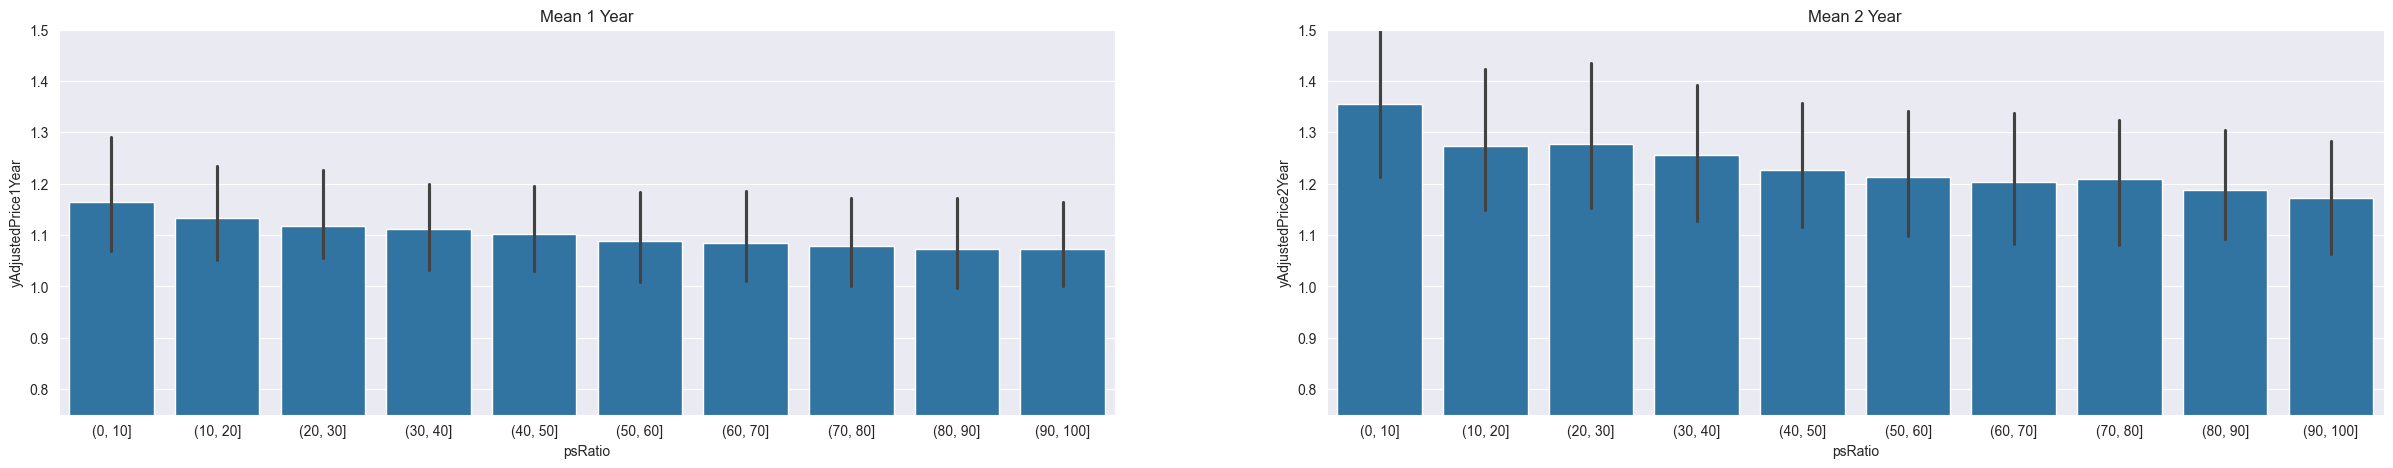

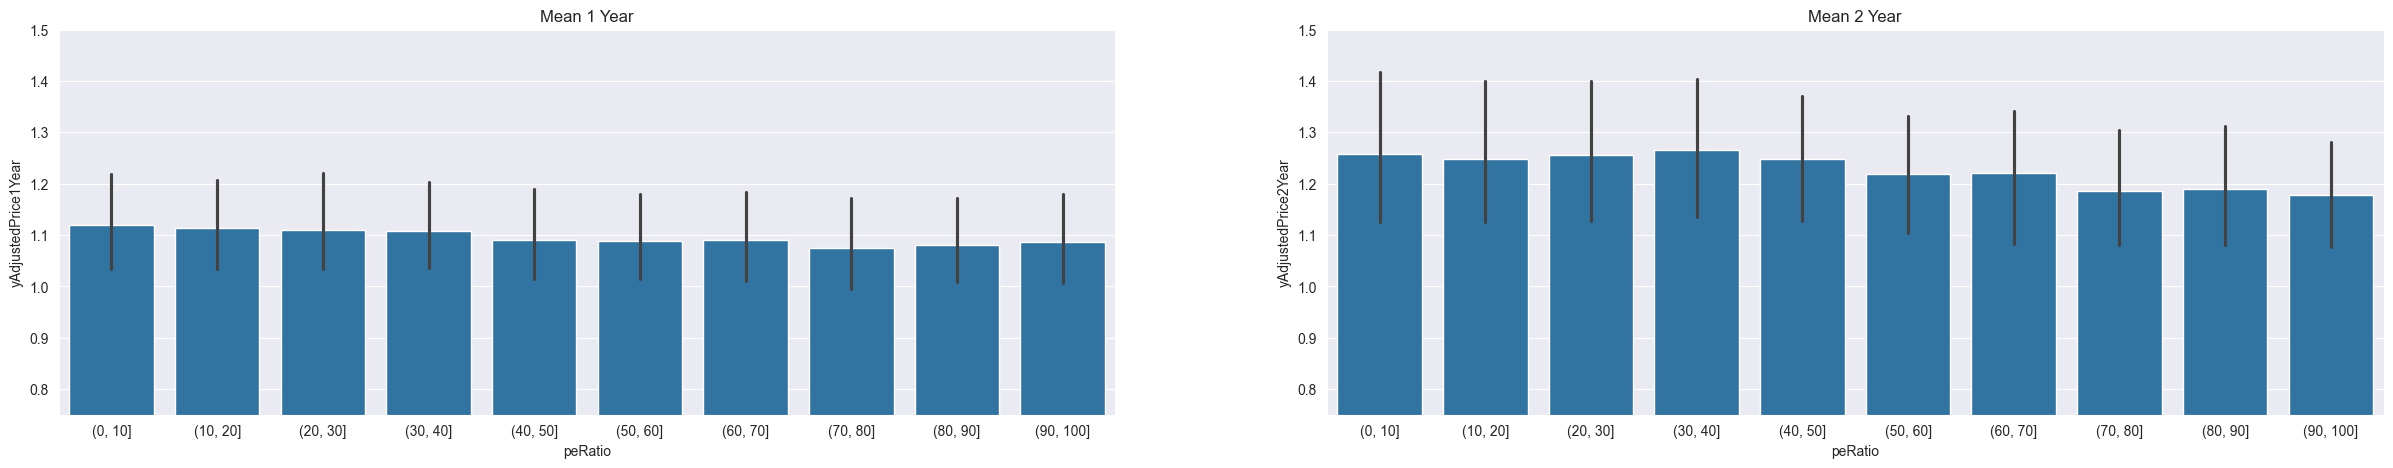

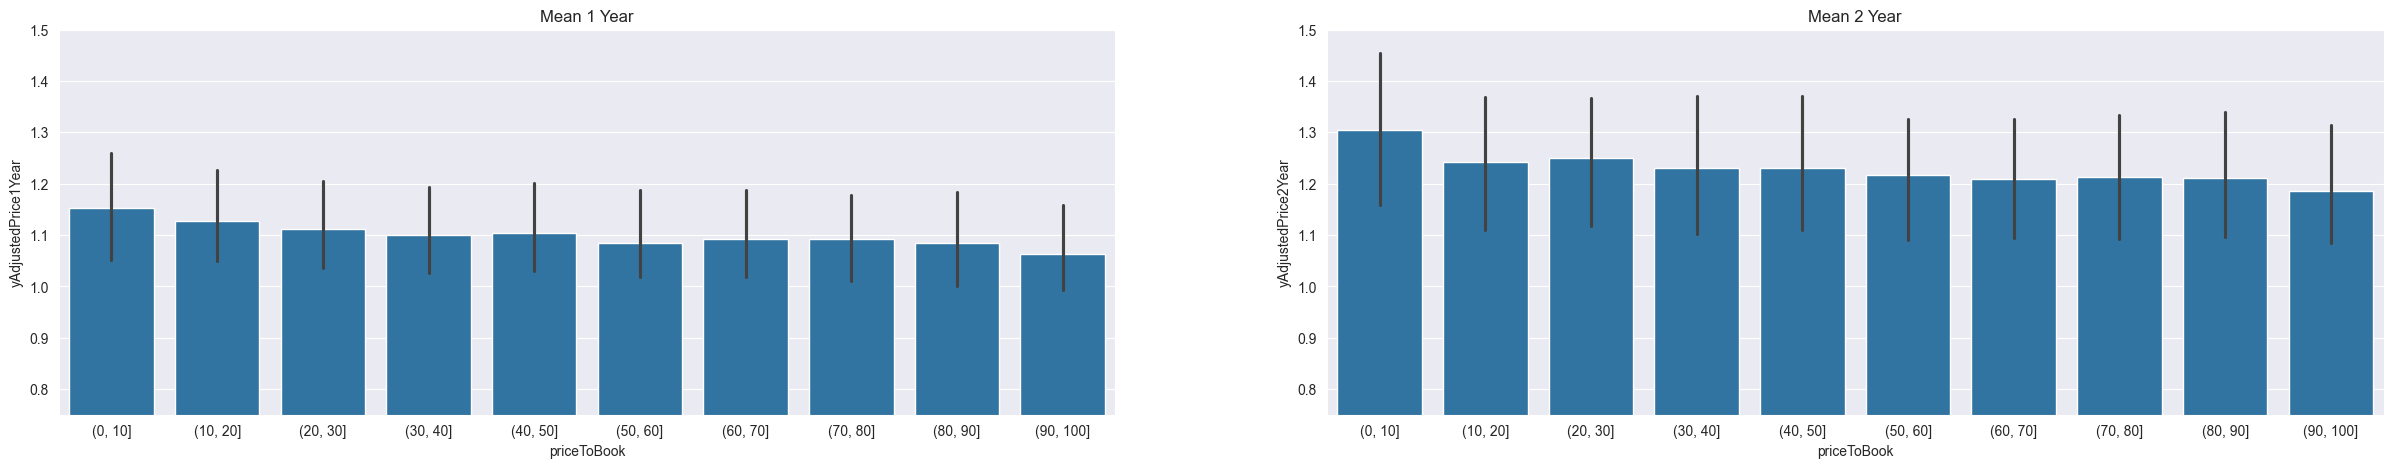

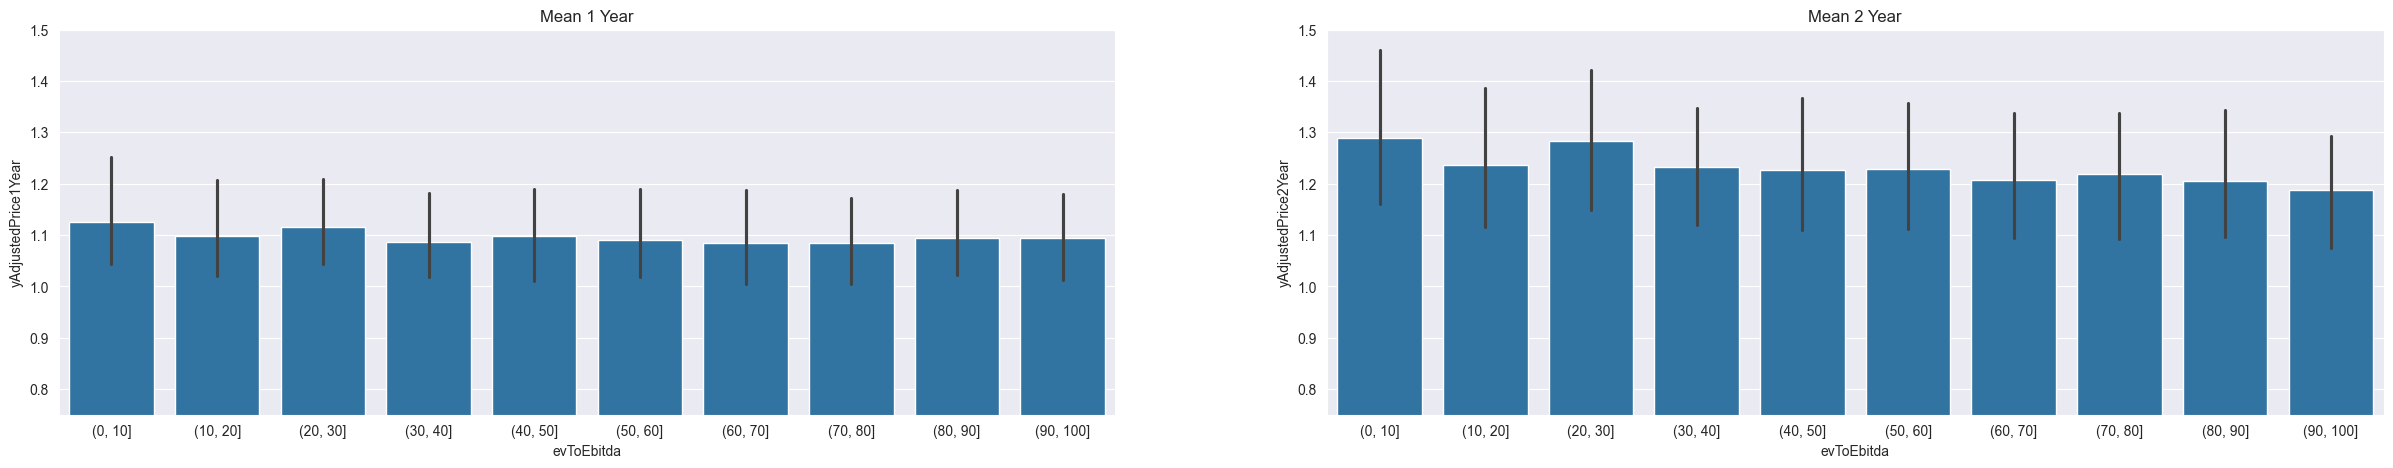

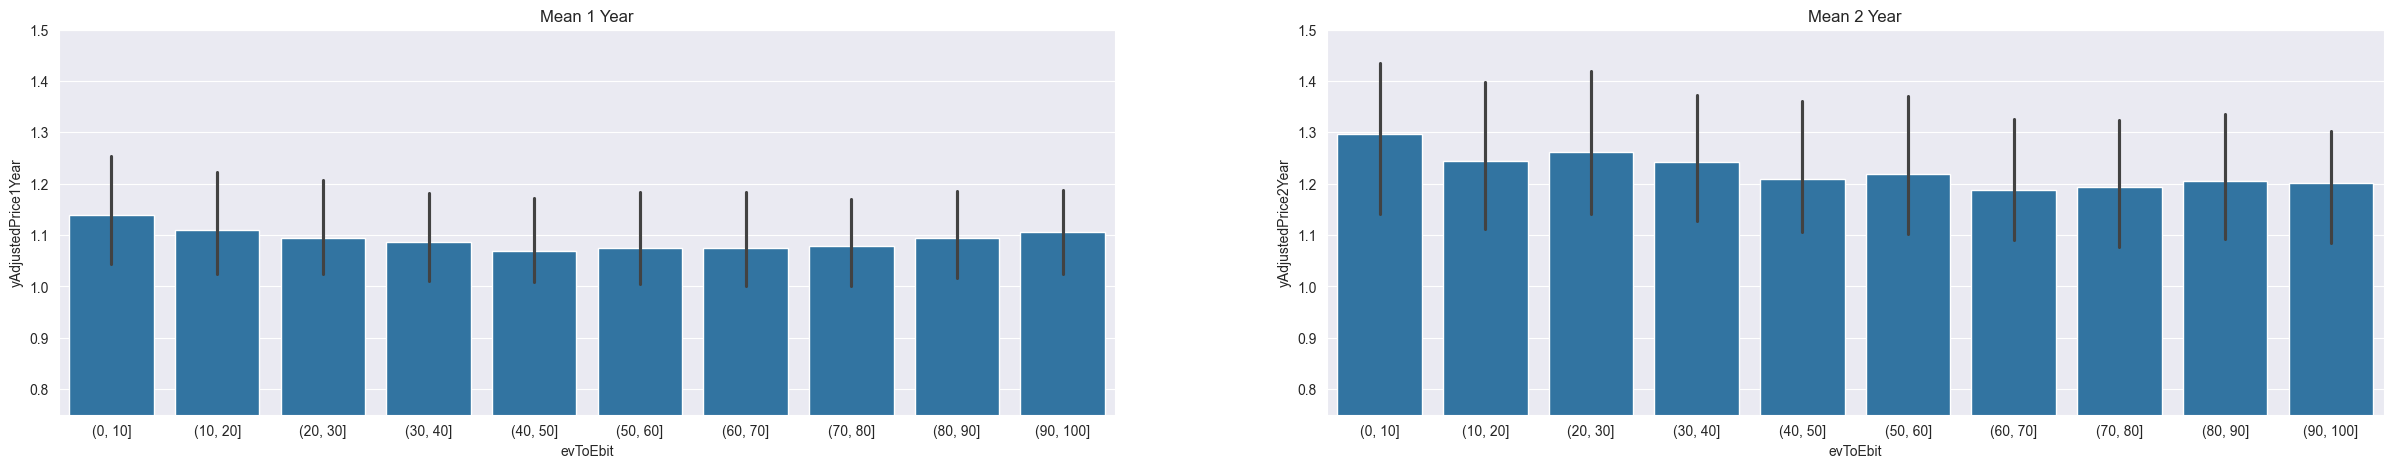

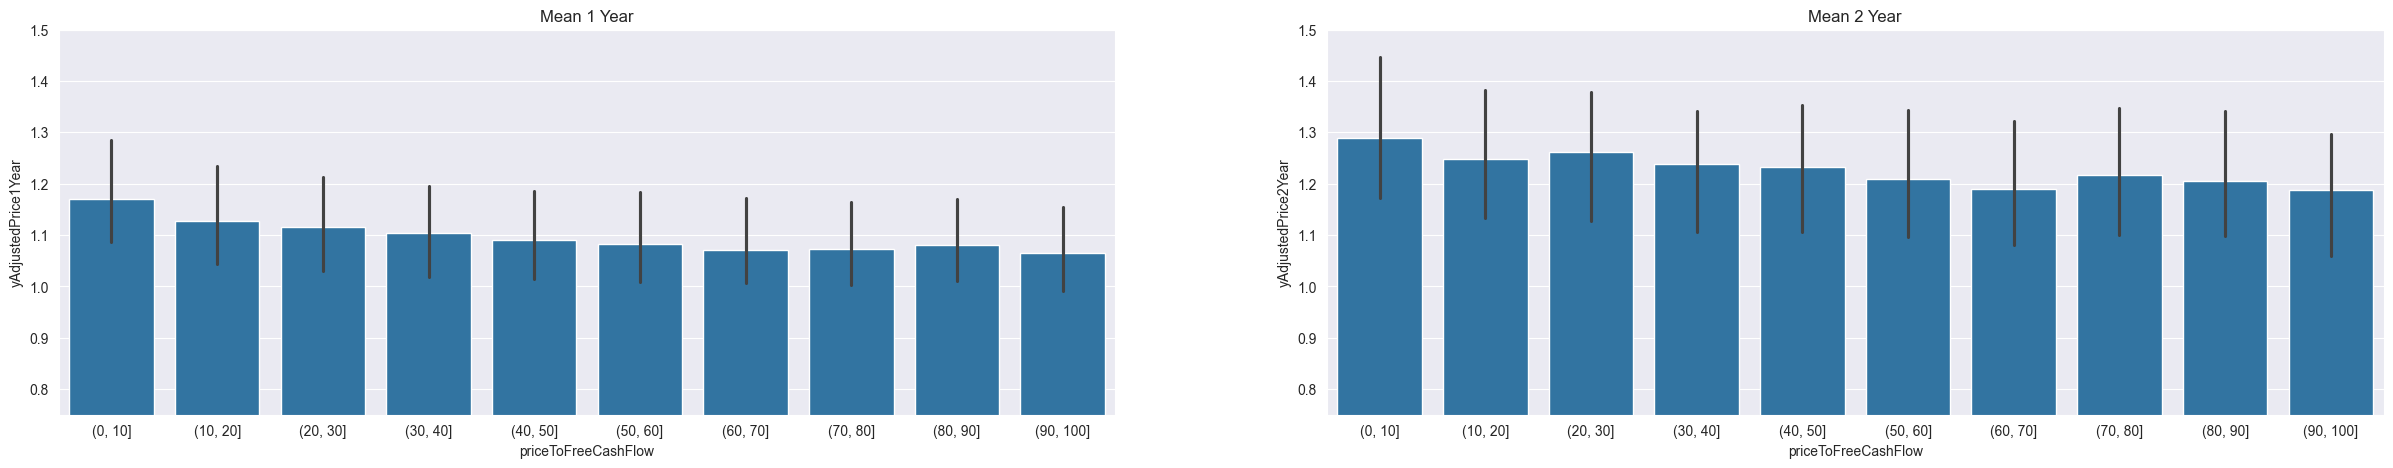

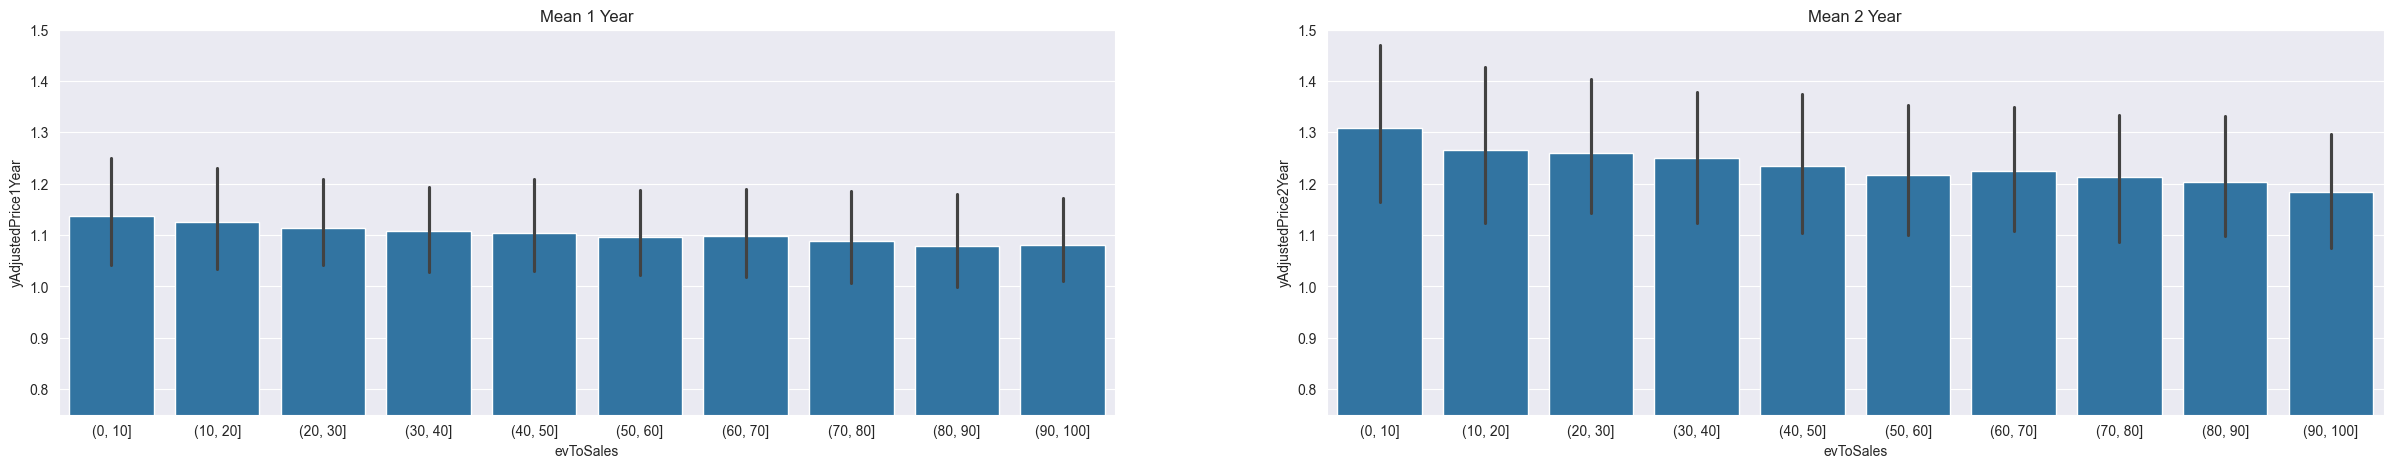

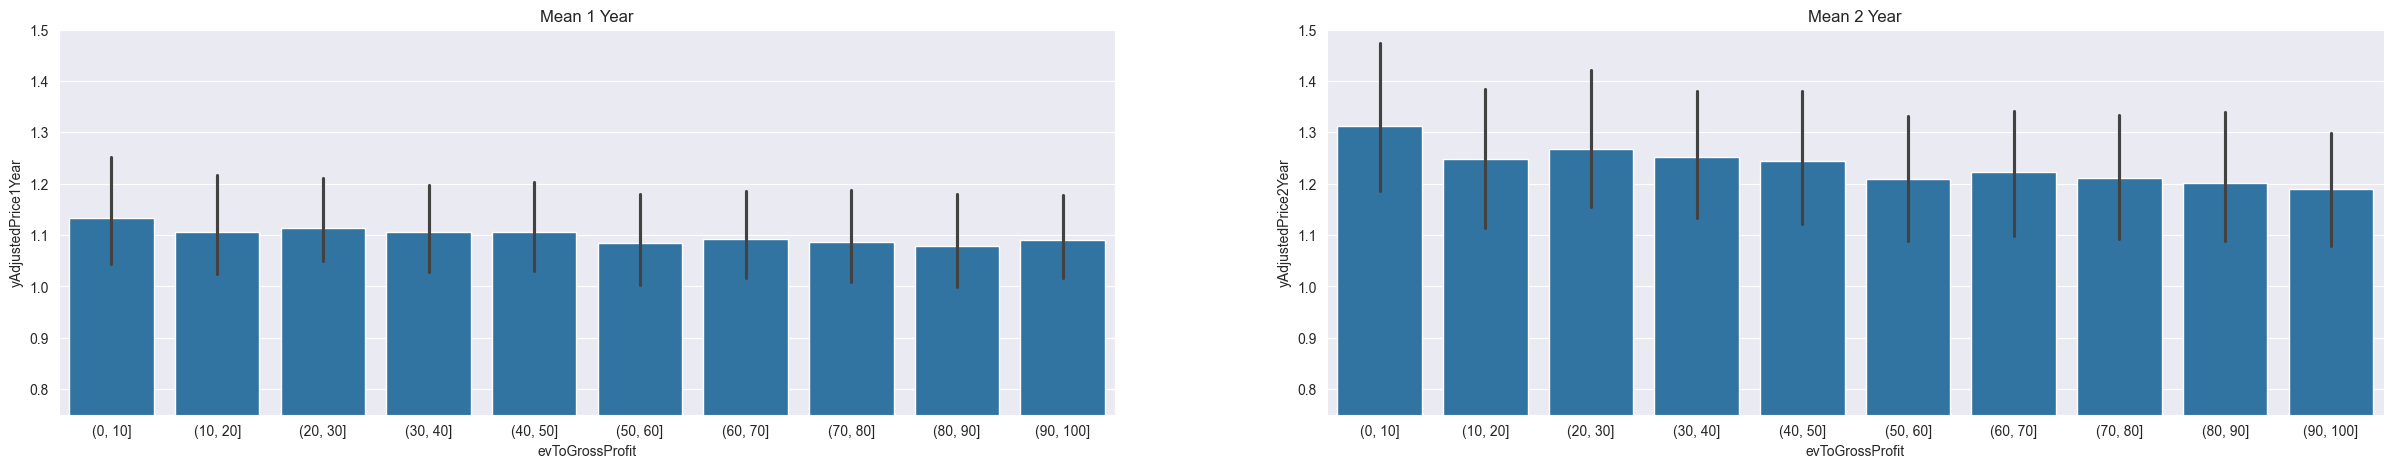

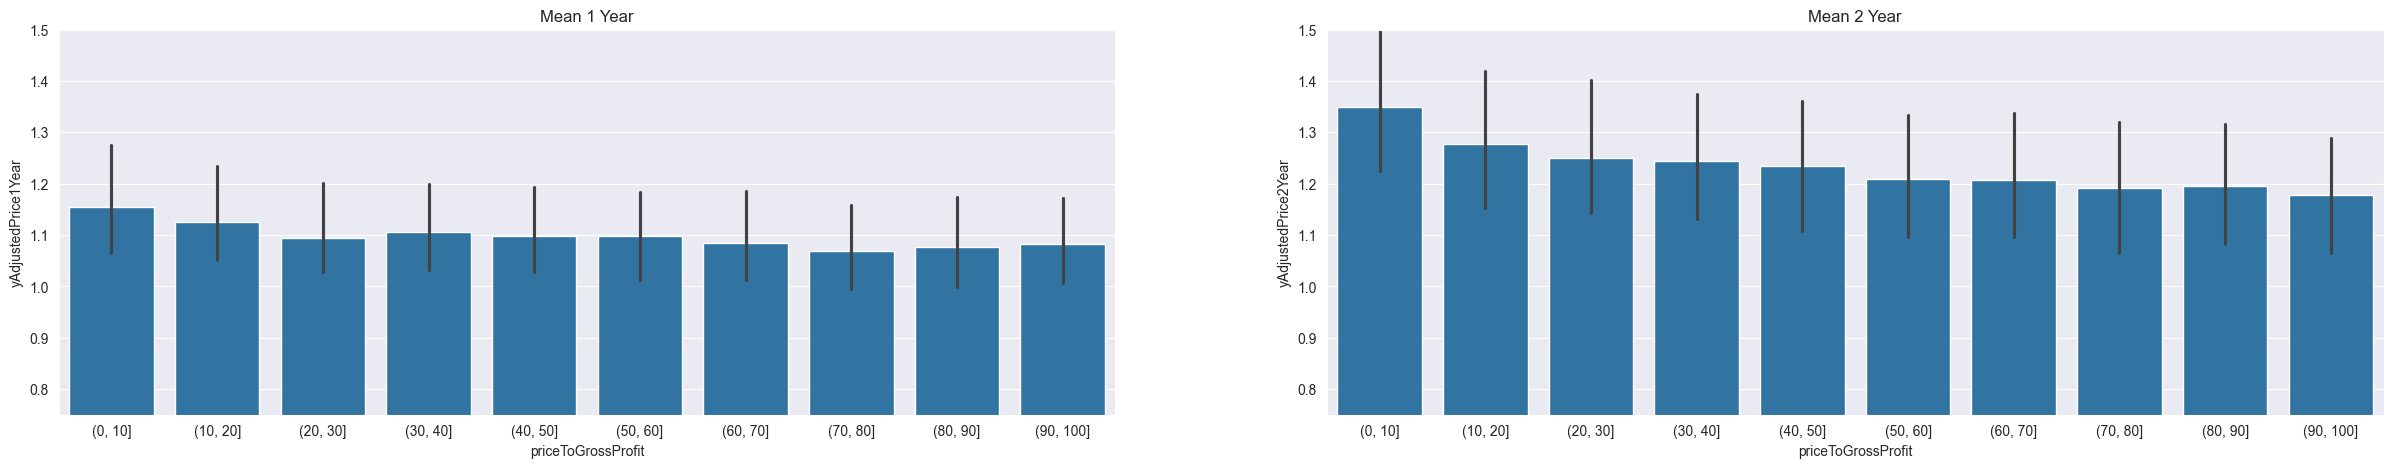

In [17]:

# relative group
for key in ratioKeys:
    bin_edges = range(0, 110, 10)
    bin_key = key + '_bin'
    relativeDf[bin_key] = pd.cut(relativeDf[key],bins=bin_edges)
    
    fig, axes = plt.subplots(1, 4, figsize=(30, 5))
    sns.barplot(relativeDf, x=bin_key, y='yAdjustedPrice1Year', estimator=np.median, errorbar=('pi', 25), ax=axes[0])
    axes[0].set(title = 'Median 1 Year', xlabel=key)
    
    sns.barplot(relativeDf, x=bin_key, y='yAdjustedPrice1Year',  errorbar=('pi', 25), ax=axes[1])
    axes[1].set(title = 'Mean 1 Year', xlabel=key)
    
    sns.barplot(relativeDf, x=bin_key, y='yAdjustedPrice2Year', estimator=np.median, errorbar=('pi', 25), ax=axes[2])
    axes[2].set(title = 'Median 2 Year', xlabel=key)
    
    sns.barplot(relativeDf, x=bin_key, y='yAdjustedPrice2Year',  errorbar=('pi', 25), ax=axes[3])
    axes[3].set(title = 'Mean 2 Year', xlabel=key)
    
    plt.show()